In [1]:
%matplotlib inline

import matplotlib
import PySide
import matplotlib.pyplot as plt
import networkx as nx
from networkx.generators.classic import empty_graph, cycle_graph, path_graph, complete_graph
from networkx.exception import NetworkXError

In [2]:
#------------------------------------------------------------------------------
#   Tools for creating small graphs
#------------------------------------------------------------------------------
def make_small_undirected_graph(graph_description, create_using=None):
    # Return a small undirected graph described by graph_description.
    if create_using is not None and create_using.is_directed():
        raise NetworkXError("Directed Graph not supported")
    return make_small_graph(graph_description, create_using)

def make_small_graph(graph_description, create_using=None):
    # Return the small graph described by graph_description.
    ltype=graph_description[0]
    name=graph_description[1]
    n=graph_description[2]

    G=empty_graph(n, create_using)
    nodes=G.nodes()

    if ltype=="adjacencylist":
        adjlist=graph_description[3]
        if len(adjlist) != n:
            raise NetworkXError("invalid graph_description")
        G.add_edges_from([(u-1,v) for v in nodes for u in adjlist[v]])
    elif ltype=="edgelist":
        edgelist=graph_description[3]
        for e in edgelist:
            v1=e[0]-1
            v2=e[1]-1
            if v1<0 or v1>n-1 or v2<0 or v2>n-1:
                raise NetworkXError("invalid graph_description")
            else:
                G.add_edge(v1,v2)
    G.name=name
    return G

In [3]:
"""
A 10 actor social network introduced by David Krackhardt
to illustrate: degree, betweenness, centrality, closeness, etc. 
The traditional labeling is:
Andre=1, Beverley=2, Carol=3, Diane=4,
Ed=5, Fernando=6, Garth=7, Heather=8, Ike=9, Jane=10.
"""

description=[
        "adjacencylist",
        "Krackhardt Kite Social Network",
        10,
        [[2,3,4,6],[1,4,5,7],[1,4,6],[1,2,3,5,6,7],[2,4,7],
         [1,3,4,7,8],[2,4,5,6,8],[6,7,9],[8,10],[9]]
         ]

G=make_small_undirected_graph(description, None)

In [4]:
G.number_of_nodes()

10

In [5]:
G.number_of_edges()

18

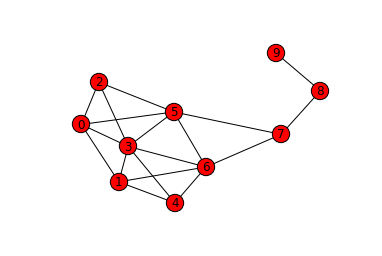

In [6]:
plt.axis('off')
pos=nx.spring_layout(G)
nx.draw(G,pos)
labels=nx.draw_networkx_labels(G,pos)
plt.show()